## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')

## Read Data

In [2]:
data = pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations.csv')
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7897 entries, 0 to 7896
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              7897 non-null   object 
 1   iso_code                             7897 non-null   object 
 2   date                                 7897 non-null   object 
 3   total_vaccinations                   4889 non-null   float64
 4   people_vaccinated                    4338 non-null   float64
 5   people_fully_vaccinated              2961 non-null   float64
 6   daily_vaccinations_raw               4112 non-null   float64
 7   daily_vaccinations                   7709 non-null   float64
 8   total_vaccinations_per_hundred       4889 non-null   float64
 9   people_vaccinated_per_hundred        4338 non-null   float64
 10  people_fully_vaccinated_per_hundred  2961 non-null   float64
 11  daily_vaccinations_per_million

### Some colors

In [4]:
india_palette = ['#ff9933','#138808','#000080']
brazil_palette =['#009c3b','#ffdf00','#002776']

## Exploratory Data Analysis


In [5]:
data['date'] = pd.to_datetime(data['date'])

As we are going to use only Brazil and India countries, let's make new datasets with those countries.

In [6]:
df_br = data[ data['country'] == 'Brazil' ]
df_in = data[ data['country'] == 'India' ]

In [7]:
df_br.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1017,Brazil,BRA,2021-01-16,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Sinovac",Ministry of Health,https://viz.saude.gov.br/extensions/DEMAS_C19V...
1018,Brazil,BRA,2021-01-17,112.0,112.0,NaN,112.0,112.0,0.00,0.00,NaN,1.0,"Oxford/AstraZeneca, Sinovac",Ministry of Health,https://viz.saude.gov.br/extensions/DEMAS_C19V...
1019,Brazil,BRA,2021-01-18,1109.0,1109.0,NaN,997.0,554.0,0.00,0.00,NaN,3.0,"Oxford/AstraZeneca, Sinovac",Ministry of Health,https://viz.saude.gov.br/extensions/DEMAS_C19V...
1020,Brazil,BRA,2021-01-19,11470.0,11470.0,NaN,10361.0,3823.0,0.01,0.01,NaN,18.0,"Oxford/AstraZeneca, Sinovac",Ministry of Health,https://viz.saude.gov.br/extensions/DEMAS_C19V...
1021,Brazil,BRA,2021-01-20,28543.0,28543.0,NaN,17073.0,7136.0,0.01,0.01,NaN,34.0,"Oxford/AstraZeneca, Sinovac",Ministry of Health,https://viz.saude.gov.br/extensions/DEMAS_C19V...


In [8]:
df_in.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3320,India,IND,2021-01-15,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Covaxin, Oxford/AstraZeneca",Ministry of Health,http://mohfw.gov.in/pdf/CumulativeCOVIDVaccina...
3321,India,IND,2021-01-16,191181.0,191181.0,NaN,191181.0,191181.0,0.01,0.01,NaN,139.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,http://mohfw.gov.in/pdf/CumulativeCOVIDVaccina...
3322,India,IND,2021-01-17,224301.0,224301.0,NaN,33120.0,112150.0,0.02,0.02,NaN,81.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,http://mohfw.gov.in/pdf/CumulativeCOVIDVaccina...
3323,India,IND,2021-01-18,454049.0,454049.0,NaN,229748.0,151350.0,0.03,0.03,NaN,110.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,http://mohfw.gov.in/pdf/CumulativeCOVIDVaccina...
3324,India,IND,2021-01-19,674835.0,674835.0,NaN,220786.0,168709.0,0.05,0.05,NaN,122.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,http://mohfw.gov.in/pdf/CumulativeCOVIDVaccina...


In [9]:
df_br.isnull().sum()

country                                 0
iso_code                                0
date                                    0
total_vaccinations                      5
people_vaccinated                       5
people_fully_vaccinated                26
daily_vaccinations_raw                  8
daily_vaccinations                      1
total_vaccinations_per_hundred          5
people_vaccinated_per_hundred           5
people_fully_vaccinated_per_hundred    26
daily_vaccinations_per_million          1
vaccines                                0
source_name                             0
source_website                          0
dtype: int64

In [10]:
df_in.isnull().sum()

country                                 0
iso_code                                0
date                                    0
total_vaccinations                      1
people_vaccinated                       1
people_fully_vaccinated                30
daily_vaccinations_raw                  3
daily_vaccinations                      1
total_vaccinations_per_hundred          1
people_vaccinated_per_hundred           1
people_fully_vaccinated_per_hundred    30
daily_vaccinations_per_million          1
vaccines                                0
source_name                             0
source_website                          0
dtype: int64

We have some missing data here. Before starting our analysis, I'll deal with some of those values.

I'm going to drop rows where total_vaccinations_per_hundred is null.

In [11]:
df_br = df_br[df_br['total_vaccinations_per_hundred'].notna()]
df_in = df_in[df_in['total_vaccinations_per_hundred'].notna()]


As we can see below, both Brazil and India uses **Oxford/AstraZeneca** vaccine. Brazil also uses **Sinovac** and India also uses **AstraZeneca**.

In [12]:
pd.DataFrame([df_br['vaccines'].unique(), df_in['vaccines'].unique()],columns=['Vaccine'],index=['Brazil','India'])

,Vaccine
Brazil,"Oxford/AstraZeneca, Sinovac"
India,"Covaxin, Oxford/AstraZeneca"


If we check the total vaccinations over time of those countries, we can clearly see that India has a higher absolute value of total vaccinations. But it's important to notice that India population is like 6 times bigger than Brazil population.

Text(0, 0.5, '')

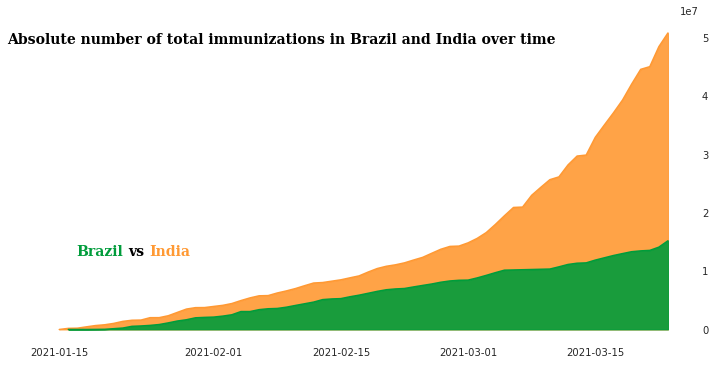

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

g1 = sns.lineplot(x=df_in['date'],y=df_in['total_vaccinations'],color=india_palette[0])
g1.fill_between(df_in['date'], 0, df_in['total_vaccinations'], color=india_palette[0], alpha=0.9)

g2 = sns.lineplot(x=df_br['date'],y=df_br['total_vaccinations'],color=brazil_palette[0])
g2.fill_between(df_br['date'], 0, df_br['total_vaccinations'], color=brazil_palette[0], alpha=0.9)


for i in ['top', 'left', 'right','bottom']:
    ax.spines[i].set_visible(False)
    
fig.text(0.1, 0.82, 'Absolute number of total immunizations in Brazil and India over time', 
       fontsize=14, fontweight='bold', fontfamily='serif',color='black')
fig.text(0.18, 0.33, 'Brazil', 
       fontsize=14, fontweight='bold', fontfamily='serif',color=brazil_palette[0])
fig.text(0.24, 0.33, 'vs', 
       fontsize=14, fontweight='bold', fontfamily='serif',color='black')
fig.text(0.265, 0.33, 'India', 
       fontsize=14, fontweight='bold', fontfamily='serif',color=india_palette[0])

ax.yaxis.tick_right()
ax.tick_params(length=0)
plt.xlabel('')
plt.ylabel('')

Looking at the next chart (of daily vaccinations), can we conclude that India is doing a better job than Brazil?

Text(0, 0.5, '')

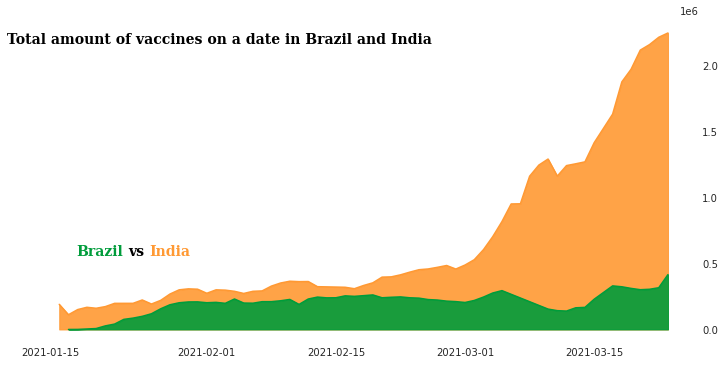

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

g1 = sns.lineplot(x=df_in['date'],y=df_in['daily_vaccinations'],color=india_palette[0])
g1.fill_between(df_in['date'], 0, df_in['daily_vaccinations'], color=india_palette[0], alpha=0.9)

g2 = sns.lineplot(x=df_br['date'],y=df_br['daily_vaccinations'],color=brazil_palette[0])
g2.fill_between(df_br['date'], 0, df_br['daily_vaccinations'], color=brazil_palette[0], alpha=0.9)

fig.text(0.1, 0.82, 'Total amount of vaccines on a date in Brazil and India', 
       fontsize=14, fontweight='bold', fontfamily='serif',color='black')
fig.text(0.18, 0.33, 'Brazil', 
       fontsize=14, fontweight='bold', fontfamily='serif',color=brazil_palette[0])
fig.text(0.24, 0.33, 'vs', 
       fontsize=14, fontweight='bold', fontfamily='serif',color='black')
fig.text(0.265, 0.33, 'India', 
       fontsize=14, fontweight='bold', fontfamily='serif',color=india_palette[0])

for i in ['top', 'left', 'right','bottom']:
    ax.spines[i].set_visible(False)

ax.yaxis.tick_right()
ax.tick_params(length=0)
plt.xlabel('')
plt.ylabel('')


What happens if we check the total vaccinations per hundred? Well, the lines switch sides. Even with India having a greater number of total vaccinations, Brazil got a higher relation between vaccination number and total population of the country.

Text(0, 0.5, '')

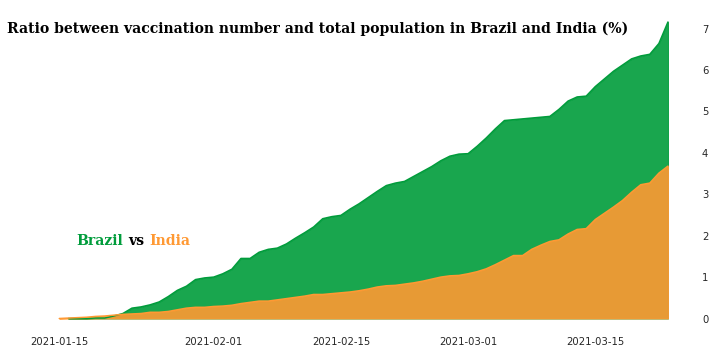

In [15]:
fig, ax = plt.subplots(1,1, figsize=(12,6))


g1 = sns.lineplot(x=df_br['date'],y=df_br['total_vaccinations_per_hundred'],color=brazil_palette[0])
g1.fill_between(df_br['date'], 0, df_br['total_vaccinations_per_hundred'], color=brazil_palette[0], alpha=0.9)

g2 = sns.lineplot(x=df_in['date'],y=df_in['total_vaccinations_per_hundred'],color=india_palette[0])
g2.fill_between(df_in['date'], 0, df_in['total_vaccinations_per_hundred'], color=india_palette[0], alpha=0.9)

fig.text(0.1, 0.82, 'Ratio between vaccination number and total population in Brazil and India (%)', 
       fontsize=14, fontweight='bold', fontfamily='serif',color='black')

for i in ['top', 'left', 'right','bottom']:
    ax.spines[i].set_visible(False)

fig.text(0.18, 0.33, 'Brazil', 
       fontsize=14, fontweight='bold', fontfamily='serif',color=brazil_palette[0])
fig.text(0.24, 0.33, 'vs', 
       fontsize=14, fontweight='bold', fontfamily='serif',color='black')
fig.text(0.265, 0.33, 'India', 
       fontsize=14, fontweight='bold', fontfamily='serif',color=india_palette[0])

ax.yaxis.tick_right()
ax.tick_params(length=0)
plt.xlabel('')
plt.ylabel('')

In the chart below, you can check the comparison (between the two countries) of the highest observed percentage of people vaccinated per hundred.

[[Text(0, 0.0, ''),
  Text(0, 1.0, ''),
  Text(0, 2.0, ''),
  Text(0, 3.0, ''),
  Text(0, 4.0, ''),
  Text(0, 5.0, ''),
  Text(0, 6.0, '')],
 [Text(0, 0, ''), Text(1, 0, '')]]

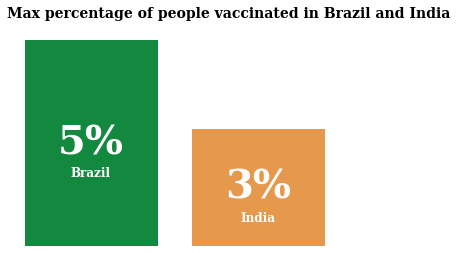

In [16]:
y = [df_br['people_vaccinated_per_hundred'].max(),
     df_in['people_vaccinated_per_hundred'].max()]
x = ['Brazil','India']
  
g=sns.barplot(x,y,palette=[brazil_palette[0],india_palette[0]])

g.text(-0.5, 6, 'Max percentage of people vaccinated in Brazil and India', 
       fontsize=14, fontweight='bold', fontfamily='Serif',color='black')

for i in ['top', 'left', 'right','bottom']:
    g.spines[i].set_visible(False)

for i in range(2):
    g.annotate(f'{round(y[i])}%', 
                xy=(i,(y[i]/2)),
                ha = 'center', va='center',fontsize=40, fontweight='bold', 
                fontfamily='Serif', color='white')
    g.annotate(f'{x[i]}', 
                xy=(i,y[i]/2-0.8),
                ha = 'center', va='center',fontsize=12, fontweight='bold', 
                fontfamily='Serif', color='white')
    
for i in ['top', 'left', 'right','bottom']:
    g.spines[i].set_visible(False)

g.set(yticklabels=[],xticklabels=[])

Now we have a graph similar to the previous one, but with information of people **fully** vaccinated per hundred.

[[Text(0, 0.0, ''),
  Text(0, 0.25, ''),
  Text(0, 0.5, ''),
  Text(0, 0.75, ''),
  Text(0, 1.0, ''),
  Text(0, 1.25, ''),
  Text(0, 1.5, ''),
  Text(0, 1.75, ''),
  Text(0, 2.0, '')],
 [Text(0, 0, ''), Text(1, 0, '')]]

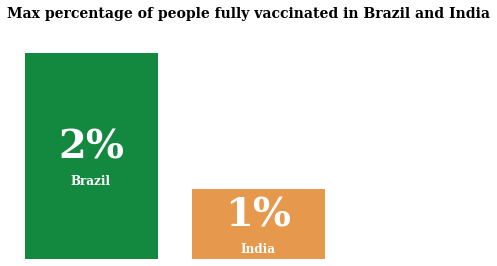

In [17]:
y = [df_br['people_fully_vaccinated_per_hundred'].max(),
     df_in['people_fully_vaccinated_per_hundred'].max()]
x = ['Brazil','India']

g=sns.barplot(x,y,palette=[brazil_palette[0],india_palette[0]])

g.text(-0.5,2, 'Max percentage of people fully vaccinated in Brazil and India', 
       fontsize=14, fontweight='bold', fontfamily='Serif',color='black')

for i in range(2):
    g.annotate(f'{round(y[i])}%', 
                xy=(i,(y[i]/2)+0.07),
                ha = 'center', va='center',fontsize=40, fontweight='bold', 
                fontfamily='Serif', color='white')
    g.annotate(f'{x[i]}', 
                xy=(i,y[i]/2-0.22),
                ha = 'center', va='center',fontsize=12, fontweight='bold', 
                fontfamily='Serif', color='white')
    
for i in ['top', 'left', 'right','bottom']:
    g.spines[i].set_visible(False)

g.set(yticklabels=[],xticklabels=[])

Our visualizations made us realize that although India has some higher absolute numbers, Brazil is doing a better job of vaccination coverage.

